<a href="https://colab.research.google.com/github/nmbayu/Files/blob/main/nmbayu_pj5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Load the data
df = pd.read_csv('/content/epa-sea-level_csv.csv')

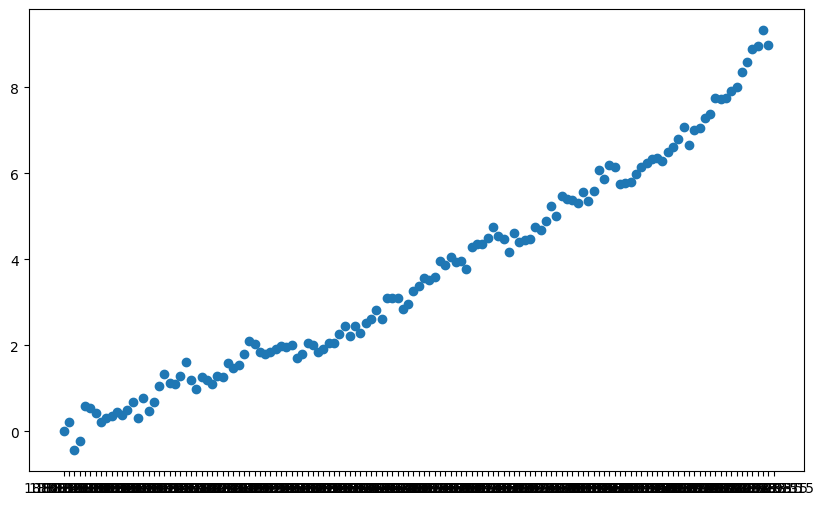

In [11]:
# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

In [12]:
# Convert the 'Year' column to datetime
df['Year'] = pd.to_datetime(df['Year'])

In [13]:
# Extract the year from the date
df['Year'] = df['Year'].dt.year

In [14]:
# Now, you can convert the 'Year' column to float
df['Year'] = df['Year'].astype(float)

In [15]:
# Ensure the data type of 'CSIRO Adjusted Sea Level' column is float
df['CSIRO Adjusted Sea Level'] = df['CSIRO Adjusted Sea Level'].astype(float)

In [16]:
# Handle missing values if any
df = df.dropna(subset=['Year', 'CSIRO Adjusted Sea Level'])

In [17]:
# Create first line of best fit
from scipy.stats import linregress
res = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
x_pred = pd.Series([i for i in range(1880, 2051)])
y_pred = res.slope*x_pred + res.intercept

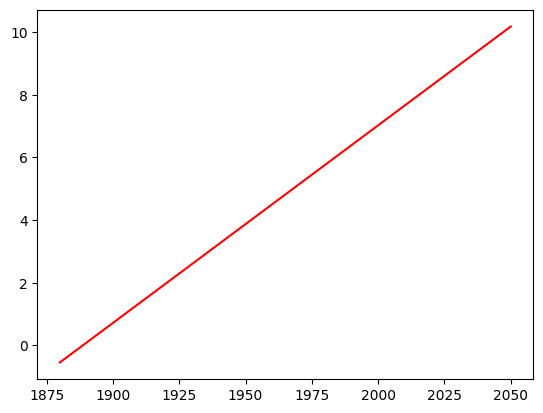

In [18]:
# Plotting
import matplotlib.pyplot as plt
plt.plot(x_pred, y_pred, 'r')